In [11]:
import matplotlib.pyplot as mtp  
import pandas as pd
import numpy as np
import torch 
from torch import nn
from sklearn.model_selection import train_test_split as split
# Normalizaiton
# torch.nn.functional.normalize
from  sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression as LR
# norm=Normalizer()
 

a:\python_env1\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


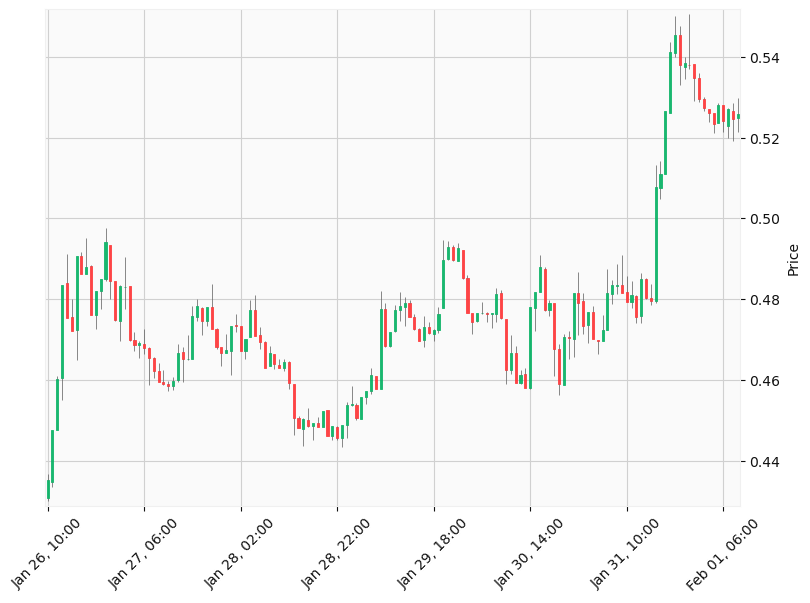

C:\Users\Erfan\AppData\Local\Temp\ipykernel_12848\413649265.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X.loc[xi,'upper_trend']=self.X.High.loc[xi]


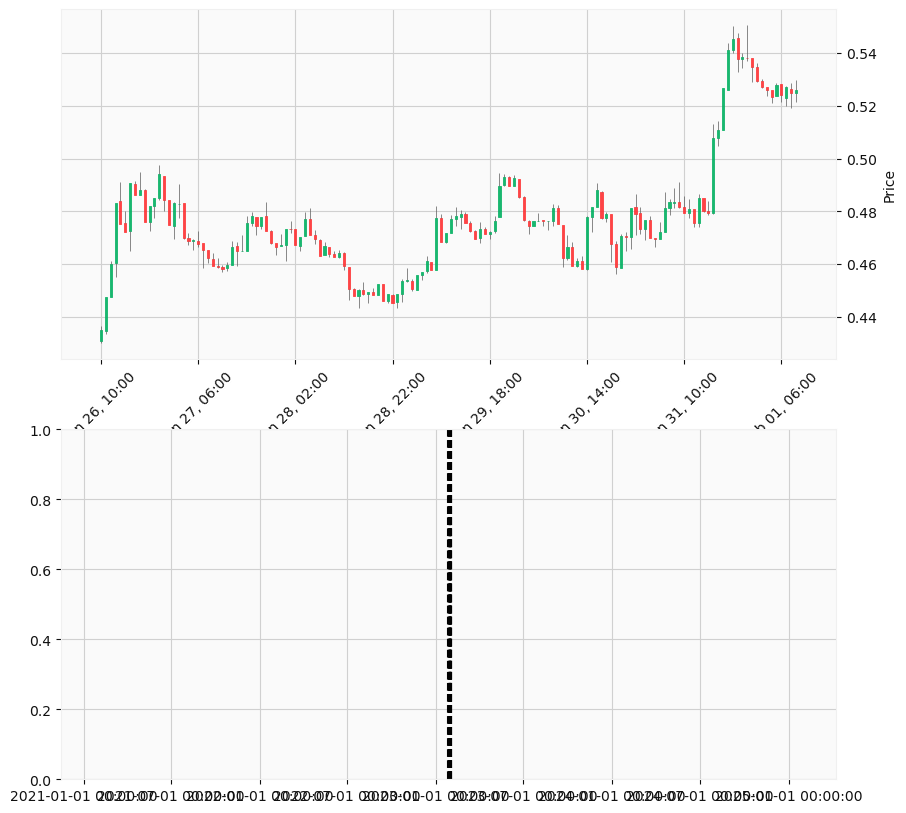

In [66]:
import mplfinance as mtp
import pandas as pd
import numpy as np
data1=pd.read_csv('cryptoh/FTM.csv',index_col=0,parse_dates=True)
# from datetime import datetime 
start_date=pd.Timestamp('2023-01-26 10:00:00')
end_date=pd.Timestamp('2023-02-01 9:00:00')
test=data1.loc[start_date:end_date]
mtp.plot(test,tight_layout=True,type='candle', style='yahoo')


# Symmetic Triangle
# Rules one
class Pattern():    
    def __init__(self,X) -> None:
        self.X=X
    def checker(self):
        counter=[]
        result_upper={'High':[],
                        'Date':[]}
        raiser=[]
        for (i,xi) in enumerate(self.X.index):
            # Check if we have 5 period of candle
            counter.append(xi)

            if len(counter) == 5 : 
                self.X.loc[xi,'upper_trend']=self.X.High.loc[xi]

                # mak_upper_trend=self.X['upper_trend'].values
                # if mak_upper_trend[-1] = np.NaN

                # if self.X.loc[xi,'Close'] > mak_upper_trend[-1] :
                # The maximum value of 5 last period of candle
                max_value=self.X.Close.loc[counter[0]:counter[-2]].max()
                
                # if result['High'][-1] != np.Nan:

                
                # Upper_trend
                if self.X.loc[xi,'High'] > max_value :
                    raiser.append(1)
                    if len(raiser) < 2:
                        result_upper['High'].append(self.X.loc[xi,'High'])
                        result_upper['Date'].append(xi)

                    elif len(raiser)== 2:
                        result_upper['Date'].pop()
                        result_upper['High'].pop()
                        result_upper['High'].append(self.X.loc[xi,'High'])
                        result_upper['Date'].append(xi)
                        raiser.clear()
                else:
                    
                    result_upper['High'].append(np.NaN)
                    result_upper['Date'].append(xi)
                    raiser.clear()

                counter.clear()      

        return result_upper,len(counter)
                
            
                # Reset the counter after 5 period 
                # counter.clear()
            
obj=Pattern(test)
result,le=obj.checker()

result,le
# Sell condition
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates
import numpy as np
import datetime
import matplotlib.dates as mdates

nan_indices = np.argwhere(np.isnan(result['High']))
Date = np.delete(result['Date'], nan_indices)
GO= np.delete(result['High'], nan_indices)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
# plt.plot(test_t.dropna()  ,ax=ax1)
mtp.plot(test, type='candle',style='yahoo', ax=ax1)
for xi in Date:
    ax2.axvline(x=xi, color='black', linestyle='--')
    date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax2.xaxis.set_major_formatter(date_format)

# ax2.scatter(Date,GO)

# interpolation method


In [31]:
for xi in Date:
    print(xi)

2023-01-26 14:00:00
2023-01-27 20:00:00
2023-01-28 01:00:00
2023-01-29 07:00:00
2023-01-29 12:00:00
2023-01-29 22:00:00
2023-01-30 08:00:00
2023-01-30 23:00:00
2023-01-31 14:00:00
2023-01-31 19:00:00


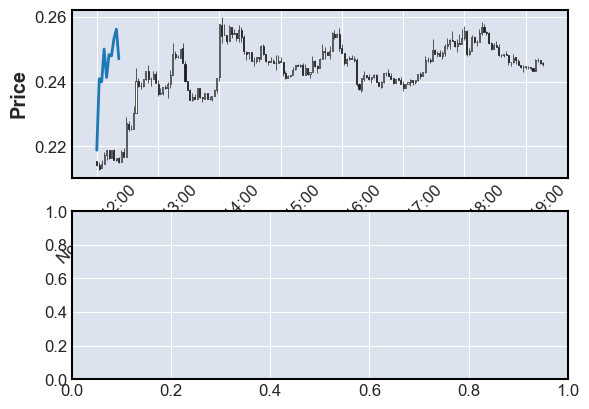

In [247]:

test_copy=test.iloc[:2].copy()
test_copy['Date']=dates.date2num(test_copy.index.tolist())

# # # Create the figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1)

a=test_copy[['Date', 'Open', 'High', 'Low', 'Close']].values
mtp.plot(test, type='candle', ax=ax1)


